# Loan Approval

In [1]:
# Importing dataset
import pandas as pd
df = pd.read_csv('training_set.csv')
testdf = pd.read_csv('testing_set.csv')

# ML Problem Formulation

In [2]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
testdf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [4]:
df['Loan_Status'].value_counts()
# We have more approved loan samples

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# 1. Data Profiling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [7]:
df.shape

(614, 13)

In [8]:
# Finding null values
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Values analysis and treatment

In [2]:
# adding most frequent values to Gender, Married, Dependents, Education, self_Employed, Credit_History, Property area
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace = True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace = True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace = True)
df['Education'].fillna(df['Education'].value_counts().idxmax(), inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace = True)
df['Property_Area'].fillna(df['Property_Area'].value_counts().idxmax(), inplace = True)

# Adding mean value for imputation of applicant_income, Coapplicantincome, LoanAmount, Loan_amount_term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace = True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

# Exploratory Data Analysis

In [3]:
# Divide columns to categorical and continous
cat = []
con = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    elif df[i].dtypes == 'int64' or 'float64':
        con.append(i)
    else:
        print("Non compatible dtype encountered : ",df[i])

## 1. Reading Distribution of continous columns

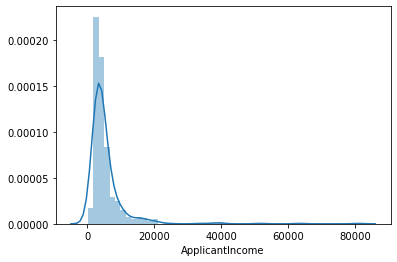

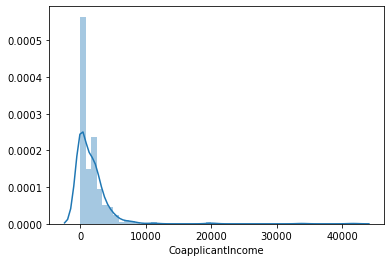

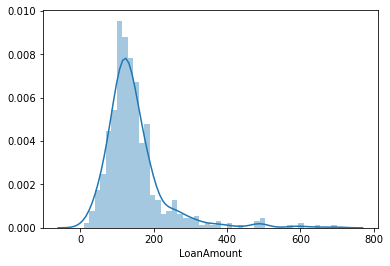

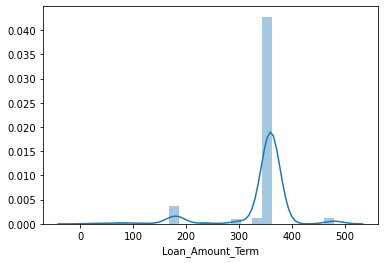

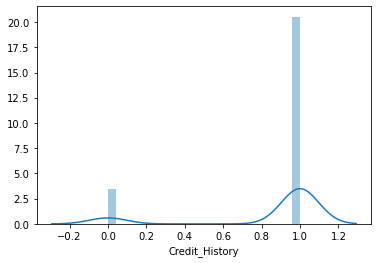

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in con:
    sns.distplot(df[i])
    plt.show()    

In [12]:
# We will remove Loan ID as it is column of uniques only
df["Loan_ID"].nunique()
cat.remove('Loan_ID')

## 2. Analysing relationship with target

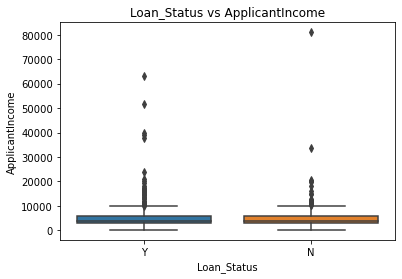

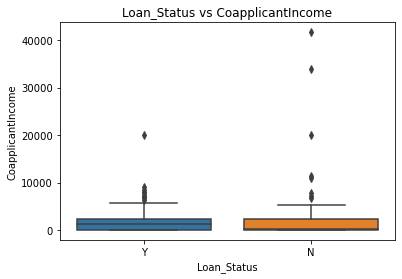

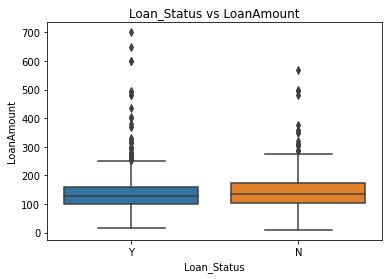

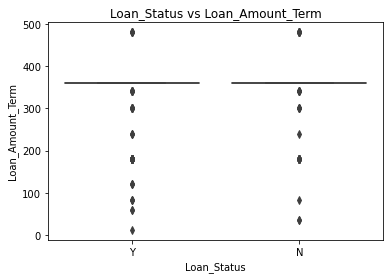

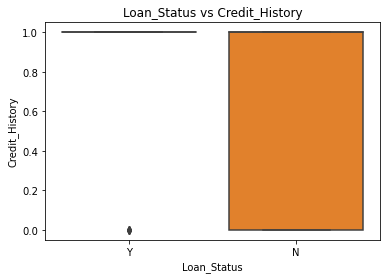

In [13]:
for i in con:
    plt.title("Loan_Status vs "+ i)
    sns.boxplot(x = 'Loan_Status', y = i, data = df)
    plt.show()

In [14]:
# Moving Credit history to Categorical
con.remove('Credit_History')
cat.append('Credit_History')

## 3. Reading spread of catgeorical values

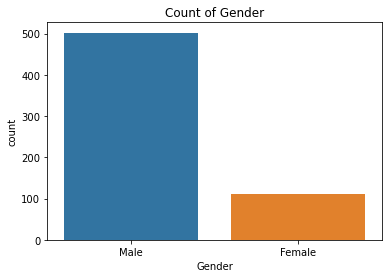

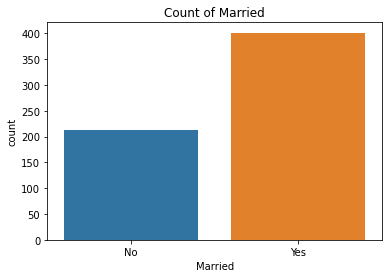

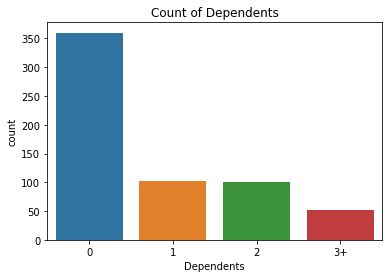

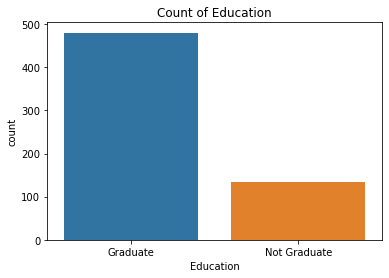

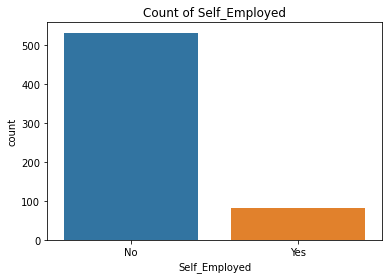

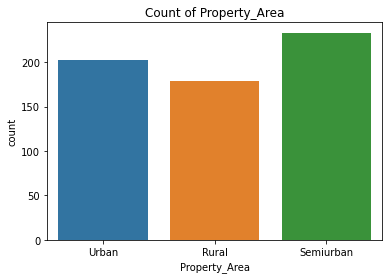

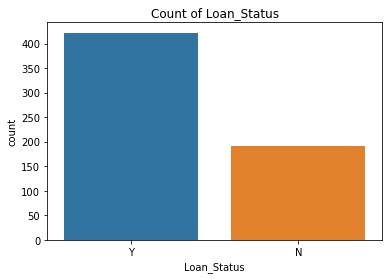

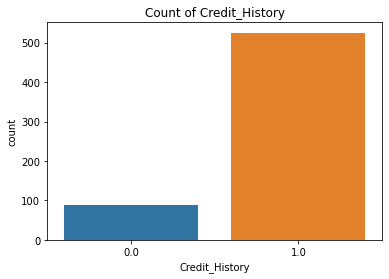

In [15]:
for i in cat:
    plt.title("Count of "+ i)
    sns.countplot(x = i,data = df)
    plt.show()

## 4. Analysing relation with the target

## 4.1 Correlation Heatmap

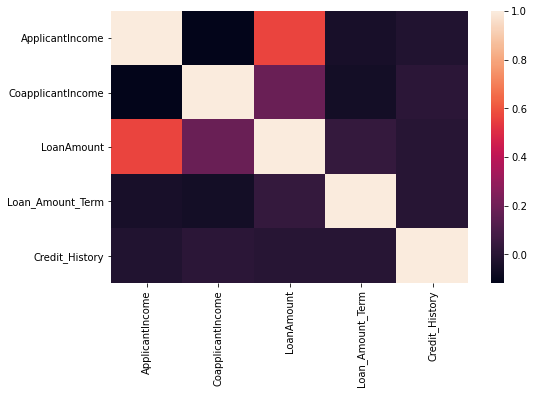

In [16]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr())

## 4.2 Categorical Column relation with target

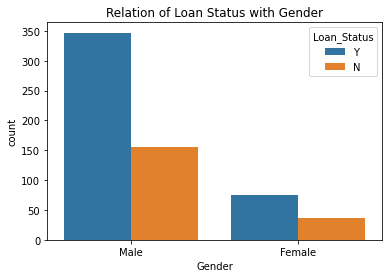

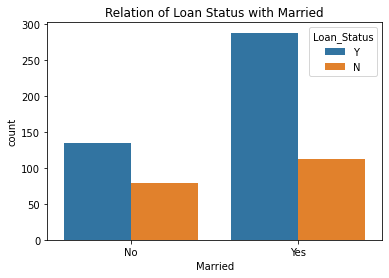

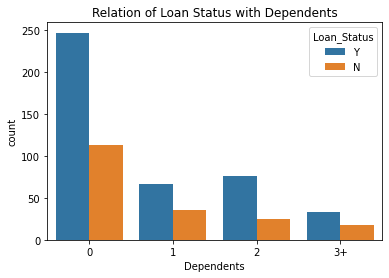

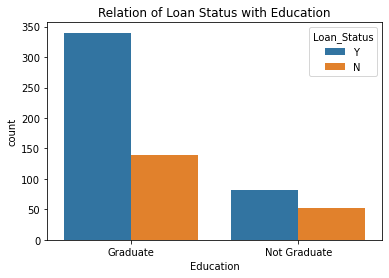

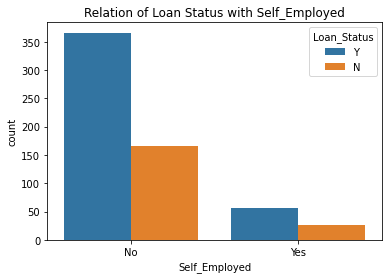

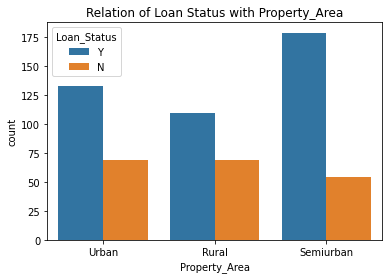

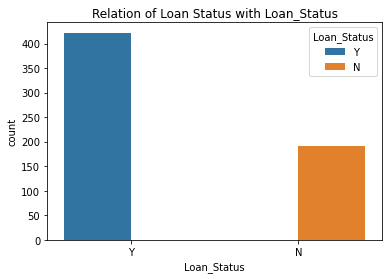

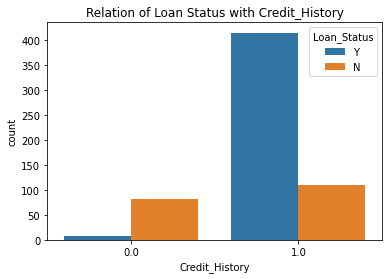

In [17]:
# Building countplot with hue
for i in cat:
    plt.title("Relation of Loan Status with "+ i)
    sns.countplot(x = df[i], hue = df['Loan_Status'])
    plt.show()

# Modelling

In [4]:
x = df.drop(labels=["Loan_ID","Loan_Status"],axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [5]:
# Defining x
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Education'] = le.fit_transform(x['Education'])
x['Married'] = le.fit_transform(x['Married'])
x['Gender'] = le.fit_transform(x['Gender'])
x['Dependents'] = le.fit_transform(x['Dependents'])
x['Self_Employed'] = le.fit_transform(x['Self_Employed'])
x['Property_Area'] = le.fit_transform(x['Property_Area'])
x['Credit_History'] = le.fit_transform(x['Credit_History'])

In [6]:
# Preparing the target column
y = df['Loan_Status'].replace(['N','Y'],[0,1])
# No means 0 - Loan was not passed
# Yes means 1 - Loan was passed

In [7]:
# Splitting dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
# Creating Decision Tree with pruning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
tp = {"max_depth":range(2,20,1),"random_state":range(10,101,10),"criterion":('entropy','gini')}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
md = cvmodel.best_params_["max_depth"]
cr = cvmodel.best_params_["criterion"]
rs = cvmodel.best_params_["random_state"]
best_tree = [cr,md,rs]
dtc = DecisionTreeClassifier(random_state=rs,max_depth=md,criterion=cr)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [10]:
# Best Tree Attribute
best_tree

['entropy', 2, 10]

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8292682926829268

In [25]:
from sklearn.metrics import recall_score
recall_score(ytest,pred)

0.9777777777777777

# Processing the testing dataset

In [26]:
testdf.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [27]:
# Cleaning testing set
# Missing value treatement
df = testdf
# adding most frequent values to Gender, Married, Dependents, Education, self_Employed, Credit_History, Property area
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace = True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace = True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace = True)
df['Education'].fillna(df['Education'].value_counts().idxmax(), inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace = True)
df['Property_Area'].fillna(df['Property_Area'].value_counts().idxmax(), inplace = True)

# Adding mean value for imputation of applicant_income, Coapplicantincome, LoanAmount, Loan_amount_term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace = True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

# Drop LoanID
x = testdf.drop(["Loan_ID"], axis =1 )

# 2. Encoding Labels
x['Education'] = le.fit_transform(x['Education'])
x['Married'] = le.fit_transform(x['Married'])
x['Dependents'] = le.fit_transform(x['Dependents'])
x['Self_Employed'] = le.fit_transform(x['Self_Employed'])
x['Property_Area'] = le.fit_transform(x['Property_Area'])
x['Credit_History'] = le.fit_transform(x['Credit_History'])
x['Gender'] = le.fit_transform(x['Gender'])
# Running on Model
pred = model.predict(x)

# Writing Results to a new file 

In [28]:
# Joining the predicted and test dataframe
testdf['Loan_Status'] = pred
testdf['Loan_Status'].replace([0,1],['N','Y'], inplace = True)

In [29]:
# Writng out the result to file
testdf.to_csv(r'submission.csv')